In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet("cmm_erdos_bootcamp_2020_timeseries.pq")

In [3]:
df.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


In [4]:
df.tail()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
1090,2019-12-27,2019,12,27,6,1,1,0,8362,3650,3661
1091,2019-12-28,2019,12,28,7,0,0,0,2906,1298,1232
1092,2019-12-29,2019,12,29,1,0,0,0,3024,1357,1349
1093,2019-12-30,2019,12,30,2,1,1,0,7444,3690,3690
1094,2019-12-31,2019,12,31,3,1,1,0,8324,3971,4062


In [5]:
df.describe()

,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
count,1095.00000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,2018.00000,6.526027,15.720548,3.994521,0.714155,0.693151,0.016438,6209.011872,3134.743379,2950.600913
std,0.81687,3.449427,8.800266,2.001363,0.452022,0.461397,0.127212,2546.338435,1232.288150,1157.136368
min,2017.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,974.000000,701.000000,574.000000
25%,2017.00000,4.000000,8.000000,2.000000,0.000000,0.000000,0.000000,3082.000000,1471.000000,1426.000000
50%,2018.00000,7.000000,16.000000,4.000000,1.000000,1.000000,0.000000,7000.000000,3646.000000,3408.000000
75%,2019.00000,10.000000,23.000000,6.000000,1.000000,1.000000,0.000000,8353.000000,4046.000000,3846.000000
max,2019.00000,12.000000,31.000000,7.000000,1.000000,1.000000,1.000000,10474.000000,5152.000000,4963.000000


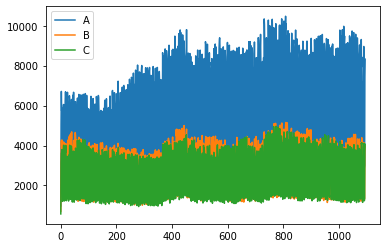

In [6]:
plt.plot(df['volume_A'],label="A")
plt.plot(df['volume_B'],label="B")
plt.plot(df['volume_C'],label="C")
plt.legend()

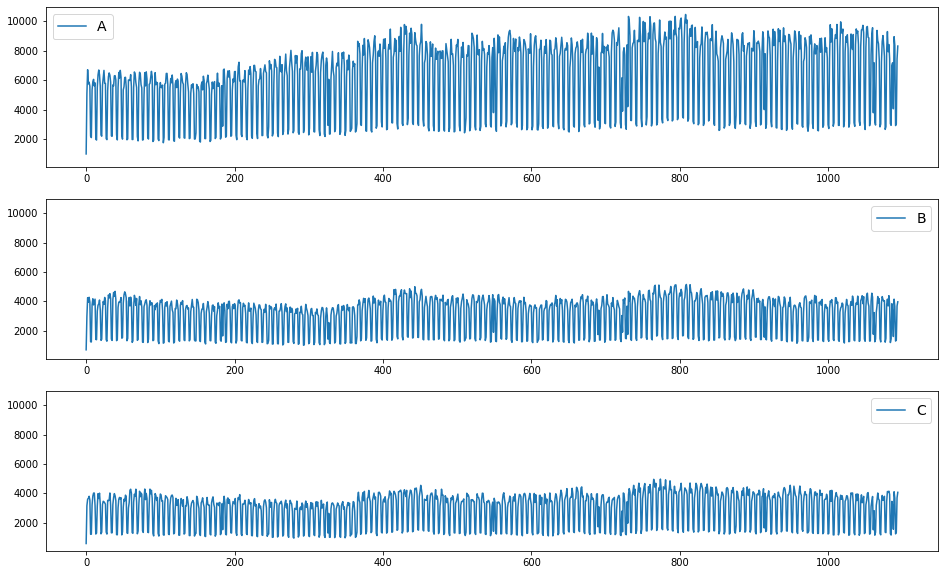

In [7]:
fig,ax = plt.subplots(3,1,figsize = (16,10),sharey=True)

ax[0].plot(df['volume_A'],label="A")
ax[1].plot(df['volume_B'],label="B")
ax[2].plot(df['volume_C'],label="C")

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [8]:
df.corr()['volume_A'].sort_values()

is_holiday       -0.152173
calendar_day      0.006083
calendar_month    0.008256
day_of_week       0.034117
calendar_year     0.305712
is_weekday        0.884200
is_workday        0.903119
volume_B          0.928147
volume_C          0.933327
volume_A          1.000000
Name: volume_A, dtype: float64

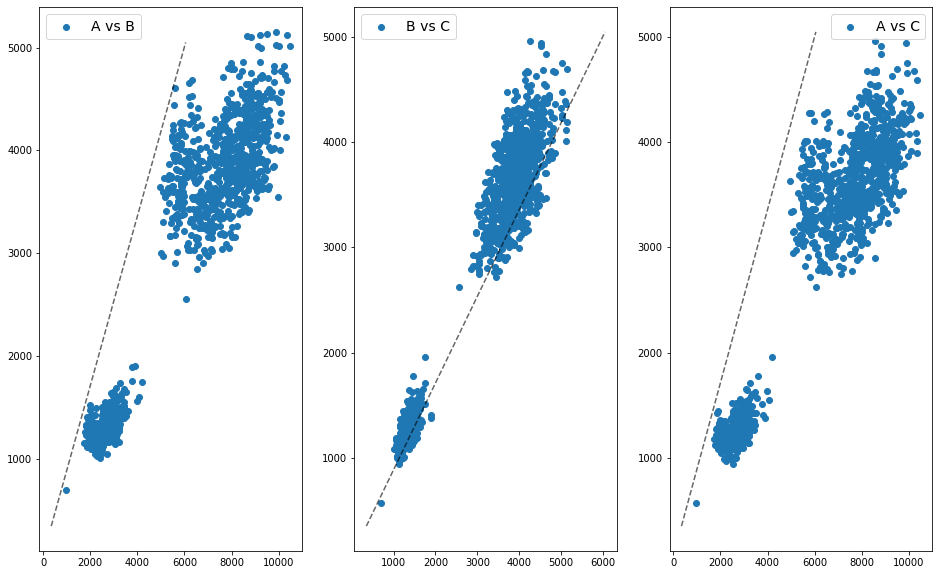

In [9]:
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=False)

ax[0].scatter(df['volume_A'],df['volume_B'],label="A vs B")
ax[1].scatter(df['volume_B'],df['volume_C'],label="B vs C")
ax[2].scatter(df['volume_A'],df['volume_C'],label="A vs C")

ax[0].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[1].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[2].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

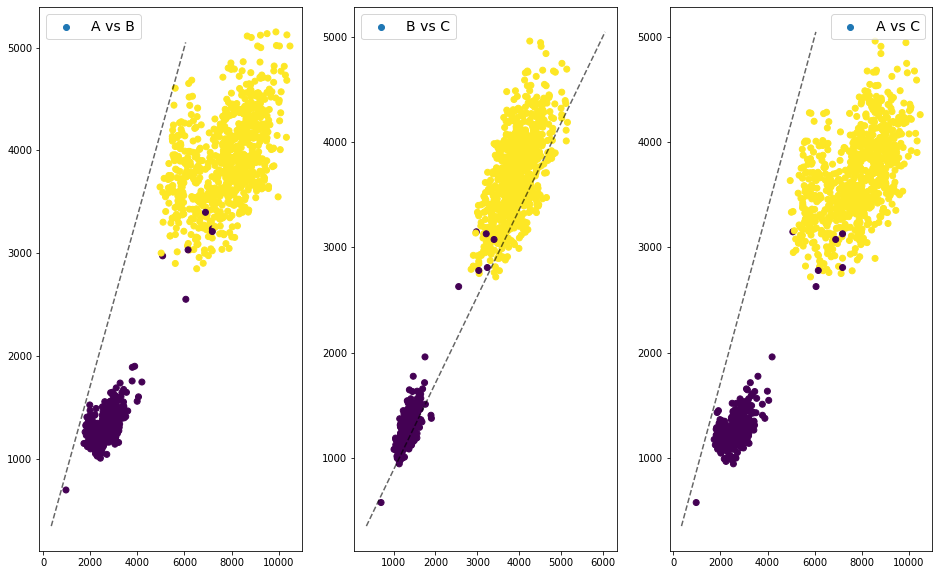

In [10]:
fig,ax = plt.subplots(1,3,figsize = (16,10),sharey=False)

ax[0].scatter(df['volume_A'],df['volume_B'],label="A vs B",c=df['is_workday'])
ax[1].scatter(df['volume_B'],df['volume_C'],label="B vs C",c=df['is_workday'])
ax[2].scatter(df['volume_A'],df['volume_C'],label="A vs C",c=df['is_workday'])

ax[0].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[1].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)
ax[2].plot(np.linspace(350,6050,10),
                np.linspace(350,5050,10),
               'k--', alpha = .6)

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [11]:
# This function makes a lag_df 
# for easy plotting
def make_lag_df(df,feature,lag):
    lag_df = df.copy()
    lag_df[feature + '_lag'] = np.nan
    
    lag_df.loc[lag:,feature + '_lag'] = lag_df.loc[0:len(lag_df)-(lag+1),feature].values
    return lag_df

In [12]:
# A function to make our plotting easier
def plot_lag(df,feature,lag,lu,up,ax=None):
    df = make_lag_df(df,feature,lag).dropna()
    if ax:
        ax.scatter(df[feature+'_lag'],df[feature])

        ax.plot(np.linspace(lu,up,100),
                np.linspace(lu,up,100),
               'k--', alpha = .6)

        ax.set_title("lag = " + str(lag),fontsize=12)
    else:
        plt.scatter(df[feature+'_lag'],df[feature])

        plt.plot(np.linspace(lu,up,100),
                np.linspace(lu,up,100),
               'k--', alpha = .6)

        plt.show()

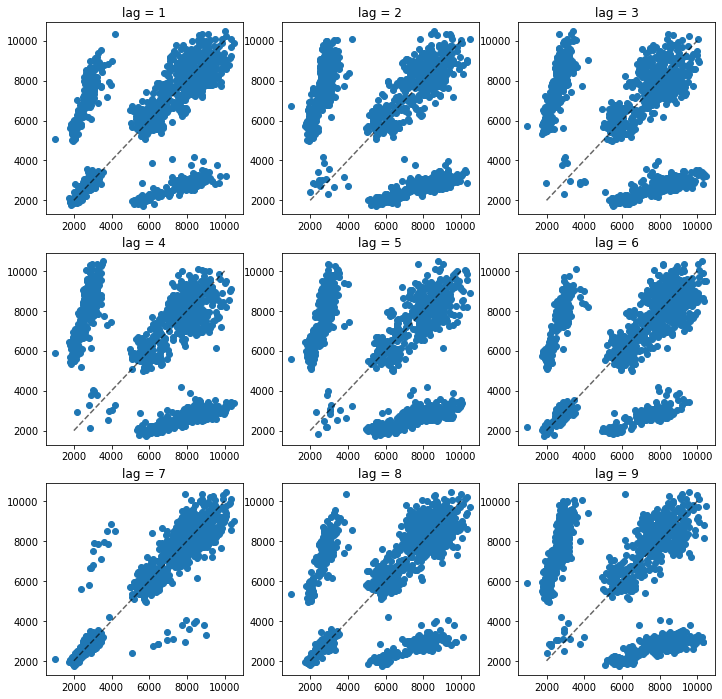

In [13]:
# we'll make lag plot for lag = 1 to 9

fig,ax = plt.subplots(3,3,
                      figsize = (12,12))

for i in range(1,10):
    plot_lag(df,'volume_A',i,2000,10000,ax[(i-1)//3, (i-1)%3])

plt.show()

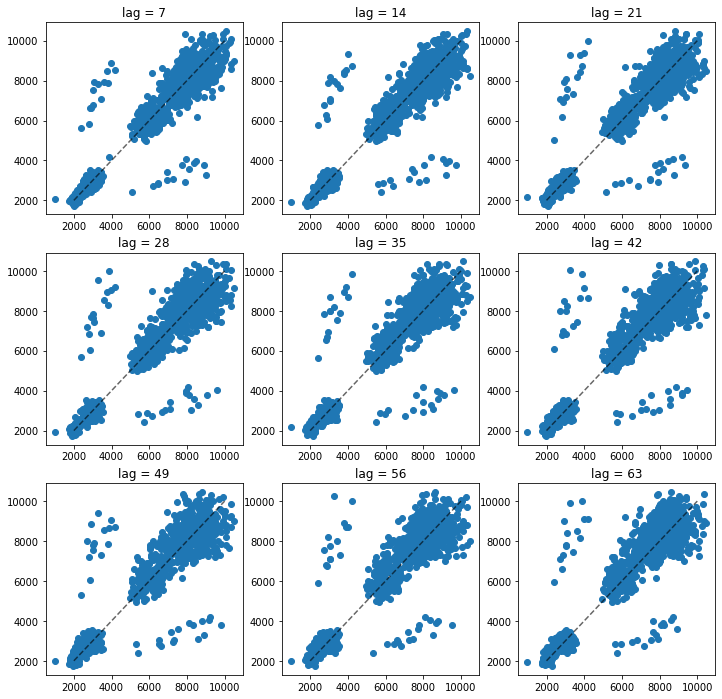

In [14]:
fig,ax = plt.subplots(3,3,
                      figsize = (12,12))
j=1
for i in range(7,70,7):
    plot_lag(df,'volume_A',i,2000,10000,ax[(j-1)//3, (j-1)%3])
    j=j+1

plt.show()

In [15]:
def get_autocorr(df,feature,lag):
    df = make_lag_df(df,feature,lag)
    mean_y = df[feature].mean()
    
    y_ts = df[feature].values
    y_lags = df.dropna()[feature + '_lag'].values
    
    numerator = np.sum((y_ts[lag:] - mean_y)*(y_lags - mean_y))
    denom = np.sum(np.power(y_ts - mean_y,2))
    
    return numerator/denom

ValueError: operands could not be broadcast together with shapes (1094,) (1087,) 

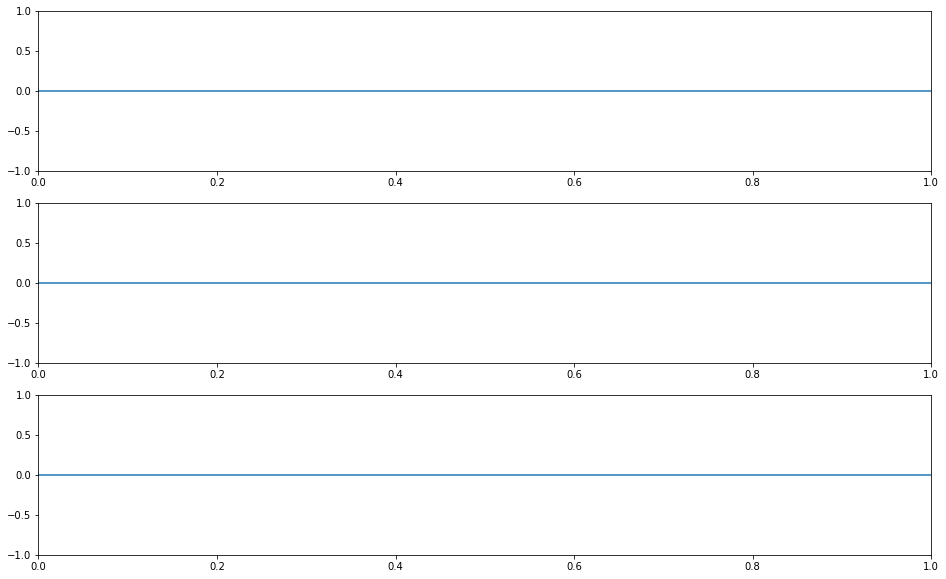

In [29]:
max_lag = 63

# ACF Plot
fig,ax = plt.subplots(3,1,figsize = (16,10),sharey=True)

plt.ylim(-1,1)

ax[0].axhline(y=0, xmin=0, xmax=20)
ax[1].axhline(y=0, xmin=0, xmax=20)
ax[2].axhline(y=0, xmin=0, xmax=20)

ax[0].scatter(np.arange(1,max_lag+1,1), 
           [get_autocorr(df,'volume_A',lag) for lag in np.arange(1,max_lag+1,1)],
           c='b')
ax[1].scatter(np.arange(1,max_lag+1,1), 
           [get_autocorr(df,'volume_B',lag) for lag in np.arange(1,max_lag+1,1)],
           c='r')
ax[2].scatter(np.arange(1,max_lag+1,1), 
           [get_autocorr(df,'volume_C',lag) for lag in np.arange(1,max_lag+1,1)],
           c='g')

for i in np.arange(1,max_lag + 1,1):
    ax[0].plot(i*np.ones(2),[0,get_autocorr(df,'volume_A',i)],'b')
    ax[1].plot(i*np.ones(2),[0,get_autocorr(df,'volume_B',i)],'r')
    ax[2].plot(i*np.ones(2),[0,get_autocorr(df,'volume_C',i)],'g')



plt.show()

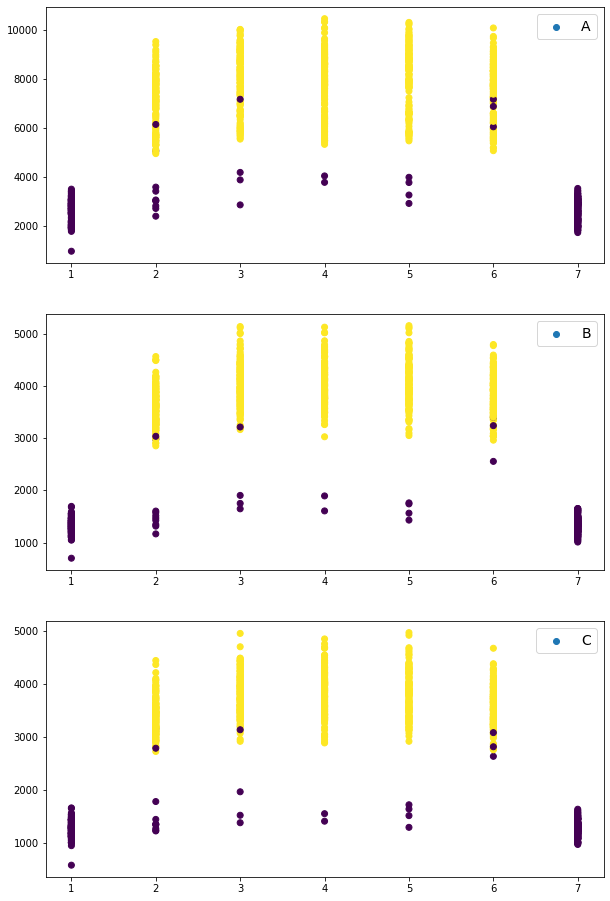

In [17]:
fig,ax = plt.subplots(3,1,figsize = (10,16))

ax[0].scatter(df['day_of_week'] ,df['volume_A'],label="A",c=df['is_workday'])
ax[1].scatter(df['day_of_week'] ,df['volume_B'],label="B",c=df['is_workday'])
ax[2].scatter(df['day_of_week'] ,df['volume_C'],label="C",c=df['is_workday'])

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [18]:
filter_data = df.drop(df[df['is_workday'] == 0 ].index)

In [19]:
filter_data.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792
5,2017-01-06,2017,1,6,6,1,1,0,5586,3956,3530
8,2017-01-09,2017,1,9,2,1,1,0,5337,3757,3214


In [20]:
filter_data.corr()['volume_A'].sort_values()

calendar_day     -0.009995
day_of_week       0.073034
calendar_month    0.073568
volume_B          0.479409
volume_C          0.531147
calendar_year     0.785429
volume_A          1.000000
is_weekday             NaN
is_workday             NaN
is_holiday             NaN
Name: volume_A, dtype: float64

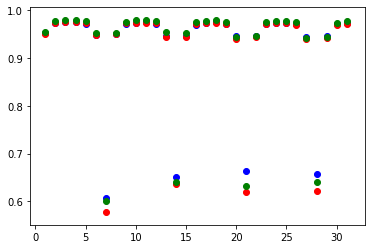

In [21]:
for i in range(1,32):
    df_diff = df.diff(periods=i)
    plt.scatter(i,df_diff.corr()['volume_A']['volume_B'],c='b')
    plt.scatter(i,df_diff.corr()['volume_A']['volume_C'],c='r')
    plt.scatter(i,df_diff.corr()['volume_C']['volume_B'],c='g')

plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

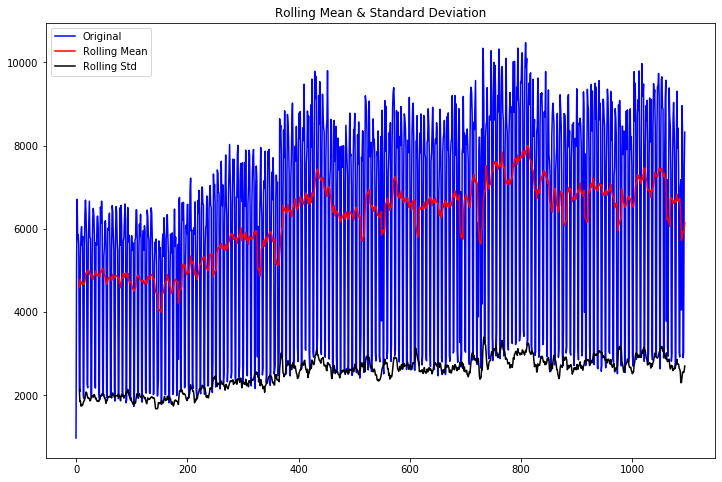

Results of Dickey-Fuller Test:
Test Statistic                   -1.907404
p-value                           0.328586
#Lags Used                       20.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (5%)              -2.864235
Critical Value (10%)             -2.568205
dtype: float64


In [23]:
test_stationarity(df['volume_A'])

In [24]:
df['first_A'] = df['volume_A'] - df['volume_A'].shift(1)

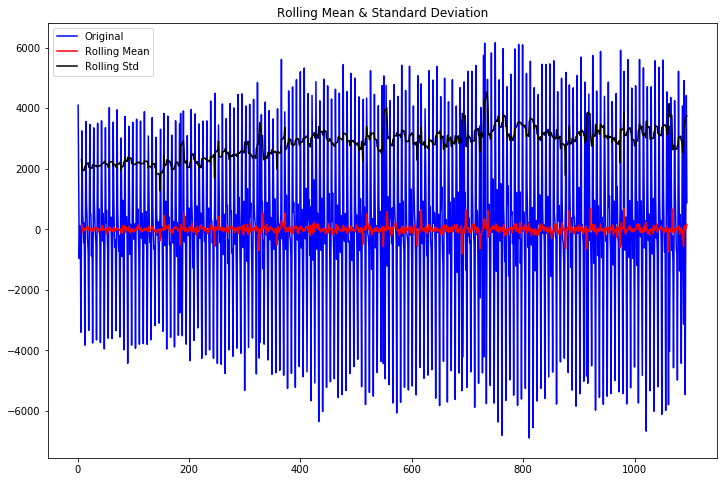

Results of Dickey-Fuller Test:
Test Statistic                -1.266998e+01
p-value                        1.250622e-23
#Lags Used                     1.900000e+01
Number of Observations Used    1.074000e+03
Critical Value (1%)           -3.436453e+00
Critical Value (5%)           -2.864235e+00
Critical Value (10%)          -2.568205e+00
dtype: float64


In [25]:
test_stationarity(df['first_A'].dropna(inplace=False))

In [26]:
df['s_first_A'] = df['first_A'] - df['first_A'].shift(7)

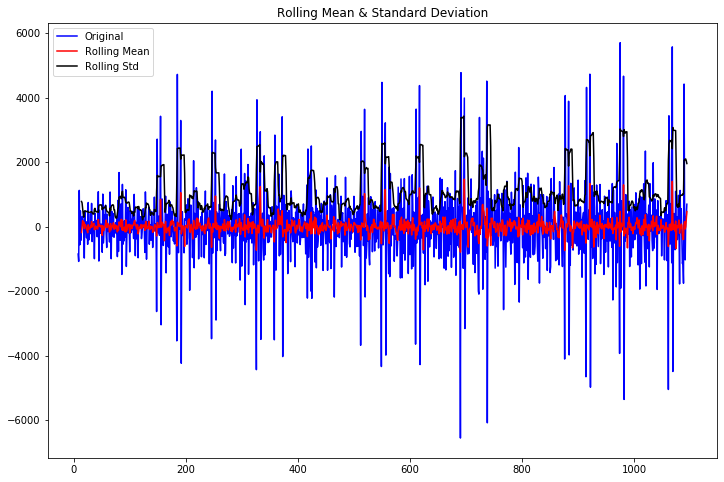

Results of Dickey-Fuller Test:
Test Statistic                -1.346815e+01
p-value                        3.423968e-25
#Lags Used                     2.200000e+01
Number of Observations Used    1.064000e+03
Critical Value (1%)           -3.436511e+00
Critical Value (5%)           -2.864260e+00
Critical Value (10%)          -2.568218e+00
dtype: float64


In [27]:
test_stationarity(df['s_first_A'].dropna(inplace=False))

ValueError: operands could not be broadcast together with shapes (1094,) (1087,) 

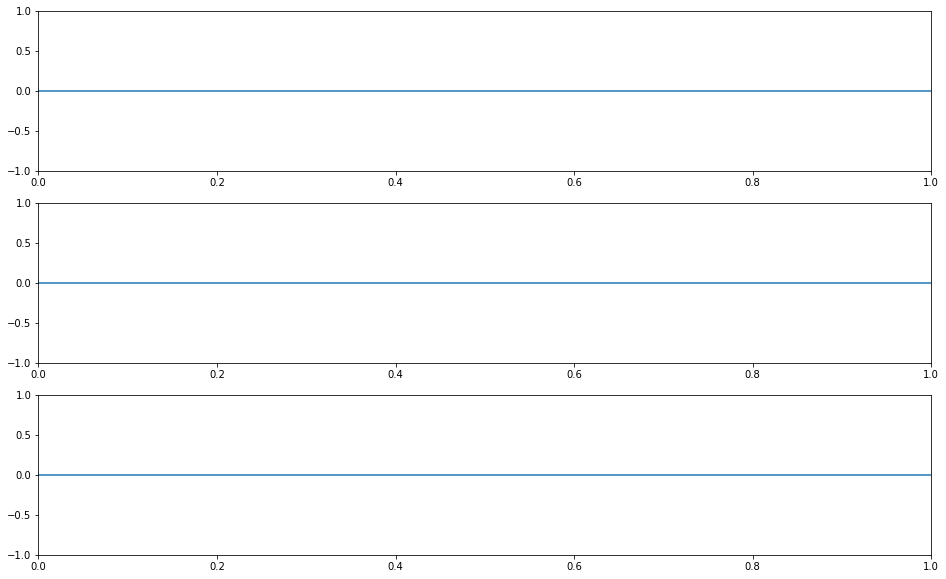

In [28]:
max_lag = 63

# ACF Plot
fig,ax = plt.subplots(3,1,figsize = (16,10),sharey=True)

plt.ylim(-1,1)

ax[0].axhline(y=0, xmin=0, xmax=20)
ax[1].axhline(y=0, xmin=0, xmax=20)
ax[2].axhline(y=0, xmin=0, xmax=20)

ax[0].scatter(np.arange(1,max_lag+1,1), 
           [get_autocorr(df,'volume_A',lag) for lag in np.arange(1,max_lag+1,1)],
           c='b')
#ax[1].scatter(np.arange(1,max_lag+1,1), 
#           [get_autocorr(df,'first_A',lag) for lag in np.arange(1,max_lag+1,1)],
#           c='r')
#ax[2].scatter(np.arange(1,max_lag+1,1), 
#           [get_autocorr(df,'s_first_A',lag) for lag in np.arange(1,max_lag+1,1)],
#           c='g')

for i in np.arange(1,max_lag + 1,1):
    ax[0].plot(i*np.ones(2),[0,get_autocorr(df,'volume_A',i)],'b')
#    ax[1].plot(i*np.ones(2),[0,get_autocorr(df,'first_A',i)],'r')
#    ax[2].plot(i*np.ones(2),[0,get_autocorr(df,'s_first_A',i)],'g')



plt.show()

In [32]:
df.head(20)

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C,first_A,s_first_A
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574,NaN,NaN
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149,4099.0,NaN
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595,1637.0,NaN
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651,-964.0,NaN
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792,117.0,NaN
5,2017-01-06,2017,1,6,6,1,1,0,5586,3956,3530,-277.0,NaN
6,2017-01-07,2017,1,7,7,0,0,0,2187,1249,1203,-3399.0,NaN
7,2017-01-08,2017,1,8,1,0,0,0,2088,1235,1214,-99.0,NaN
8,2017-01-09,2017,1,9,2,1,1,0,5337,3757,3214,3249.0,-850.0
9,2017-01-10,2017,1,10,3,1,1,0,5894,4178,3807,557.0,-1080.0
